In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class Simple3DCNN(nn.Module):
    def __init__(self):
        super(Simple3DCNN, self).__init__()
        self.conv1 = nn.Conv3d(in_channels=1, out_channels=8, kernel_size=32, stride=1, padding=0)
        self.pool = nn.MaxPool3d(kernel_size=2, stride=2, padding=0)
        self.conv2 = nn.Conv3d(8, 16, 48, padding=0)
        self.fc1 = nn.Linear(8 * 48 * 74 * 48, 512)  # Adjust the size
        self.fc_rotation = nn.Linear(512, 2)  # Two classes for rotation
        self.fc_input = nn.Linear(512, 5)  # Five classes for input type

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        print(x.shape)
        x = self.pool(F.relu(self.conv2(x)))
        print(x.shape) #torch.Size([32, 64, 45, 64]) for 256x256 [32, 32, 45, 32]) for 128x128
        x = x.view(-1, 8 * 48 * 74 * 48)  # Flatten the tensor
        x = F.relu(self.fc1(x))
        rotation_output = self.fc_rotation(x)
        input_output = self.fc_input(x)
        return rotation_output, input_output

In [3]:
# Load the trained model
model = torch.load('models/big_kernel.pt')
model.eval()  # Set the model to evaluation mode

Simple3DCNN(
  (conv1): Conv3d(1, 8, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
  (pool): MaxPool3d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv3d(8, 16, kernel_size=(64, 64, 64), stride=(1, 1, 1), padding=(1, 1, 1))
  (fc1): Linear(in_features=224, out_features=512, bias=True)
  (fc_rotation): Linear(in_features=512, out_features=2, bias=True)
  (fc_input): Linear(in_features=512, out_features=5, bias=True)
)

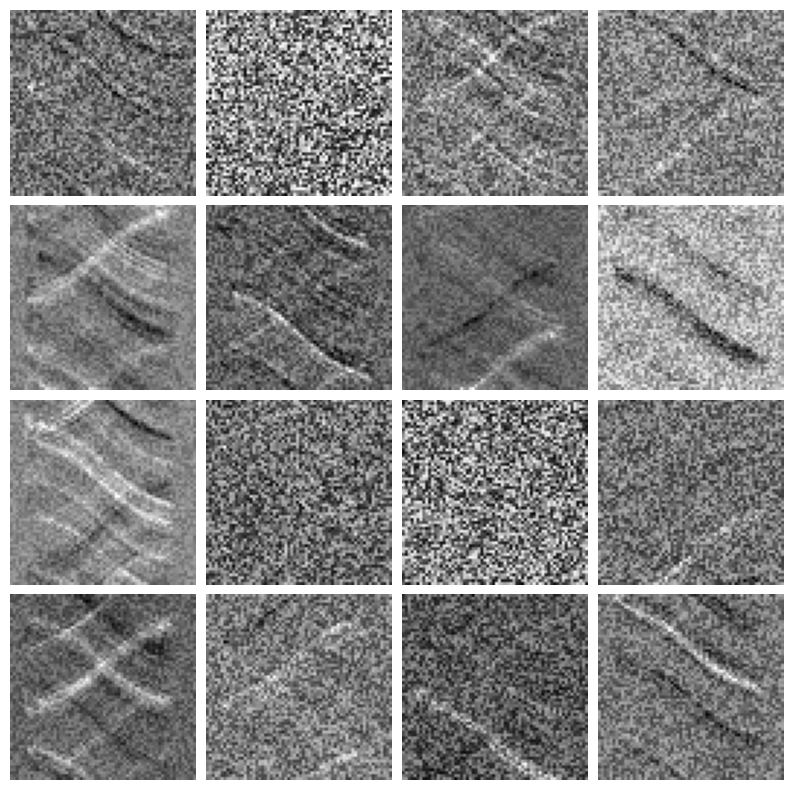

In [28]:
# Function to plot slices of 3D kernels
def plot_3d_kernels(tensor, slice_num=0, num_cols=4):
    if not tensor.ndim == 5:
        raise Exception("Assumes a 5D tensor")
    
    num_kernels = tensor.shape[0]
    num_rows = 1 + num_kernels // num_cols
    fig = plt.figure(figsize=(10, 10))
    
    for i in range(num_kernels):
        ax = fig.add_subplot(4, 4, i + 1)
        npimg = np.array(tensor[i, 1, slice_num, :, :].cpu().numpy(), np.float32)
        npimg = (npimg - np.min(npimg)) / (np.max(npimg) - np.min(npimg))
        ax.imshow(npimg, cmap='gray')
        ax.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])

    plt.subplots_adjust(wspace=0.05, hspace=0.05)
    plt.show()

# Select a layer and a slice number
conv_layer = model.conv2.weight.data
slice_num = 48 # You can change this to visualize different slices

# Visualize the kernels
plot_3d_kernels(conv_layer, slice_num=slice_num)